<a href="https://colab.research.google.com/github/SaurabhVaze/sales-prediction/blob/main/Project_1_Data_Preprocessing_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 3

Saurabh Vaze

06/09/22

#Parts 1+2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
sales_df = pd.read_csv('/content/sales_predictions.csv')

In [2]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
sales_df.shape # 1. number of rows/columns

(8523, 12)

In [4]:
sales_df.info()  # 2. What are the datatypes of each variable?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
sales_df.duplicated().sum()        # 3. Are there duplicates? If so, drop any duplicates.

0

In [6]:
sales_df.isna().sum()      # 4. Identify missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# 5. Decide on how to address the missing values and do it! 
sales_df.groupby(['Outlet_Type'])['Outlet_Size'].value_counts() #find possible correlation between outlet type and size (which has many missing values)


Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [8]:
sales_df.drop(columns='Outlet_Size', inplace=True) #Drop Outlet Size column because Outlet_Type can reflect similar insight with high correlation regarding size of the store

In [9]:
mean_weight= sales_df['Item_Weight'].mean() # Replace missing Item Weight with Column average
sales_df['Item_Weight'].fillna(mean_weight, inplace=True)

In [10]:
sales_df.isna().sum() # 6. No remaining missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
sales_df.sample(50) #find columns with irregular column values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7366,FDY50,5.800000,Low Fat,0.131697,Dairy,89.4172,OUT017,2007,Tier 2,Supermarket Type1,2498.0816
934,FDQ21,21.250000,Low Fat,0.019502,Snack Foods,120.8756,OUT018,2009,Tier 3,Supermarket Type2,3150.5656
7597,FDU28,12.857645,Regular,0.093464,Frozen Foods,189.1214,OUT027,1985,Tier 3,Supermarket Type3,2261.0568
7013,NCY53,12.857645,Low Fat,0.058198,Health and Hygiene,110.4544,OUT027,1985,Tier 3,Supermarket Type3,4250.4672
3110,FDV03,12.857645,LF,0.057810,Meat,156.2314,OUT027,1985,Tier 3,Supermarket Type3,2947.4966
5098,FDI56,7.325000,Low Fat,0.093914,Fruits and Vegetables,93.2146,OUT017,2007,Tier 2,Supermarket Type1,1733.0774
4404,FDO01,21.100000,Regular,0.020751,Breakfast,128.7994,OUT049,1999,Tier 1,Supermarket Type1,1927.4910
7162,FDG08,13.150000,Regular,0.165616,Fruits and Vegetables,172.6764,OUT049,1999,Tier 1,Supermarket Type1,2061.3168
2947,FDI12,9.395000,Regular,0.100967,Baking Goods,86.8856,OUT017,2007,Tier 2,Supermarket Type1,2548.6824
8012,FDA21,13.650000,Low Fat,0.035954,Snack Foods,185.2924,OUT035,2004,Tier 2,Supermarket Type1,3146.5708


In [12]:
sales_df['Item_Fat_Content'].value_counts() # irregular labelling in Fat Content classification

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
sales_df['Item_Fat_Content']= sales_df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')  #replace 'LF' and 'low fat' labels


In [14]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('reg', 'Regular') # Replace 'reg' label

In [15]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
nums = sales_df.filter(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], axis = 1) # new df of only numerical columns from sales_df

In [17]:
nums.describe().round(2) # statistics of numerical columns

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,2181.29
std,4.23,0.05,62.28,1706.50
min,4.56,0.00,31.29,33.29
25%,9.31,0.03,93.83,834.25
50%,12.86,0.05,143.01,1794.33
75%,16.00,0.09,185.64,3101.30
max,21.35,0.33,266.89,13086.96


In [18]:
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


#Part 3: Data Viz

In [19]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


Text(0.5, 1.0, 'Item weight Histogram')

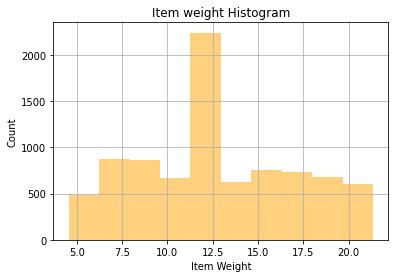

In [20]:
sales_df['Item_Weight'].hist(color='orange', alpha = 0.5 ) #Histogram
plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.title('Item weight Histogram')

[Text(0.5, 1.0, 'Item Fat Content vs MRP')]

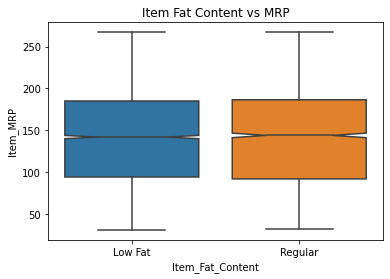

In [21]:
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', notch = True, data=sales_df).set(title='Item Fat Content vs MRP') # boxplot



[Text(0.5, 1.0, 'Sales Predictions Correlation Heatmap')]

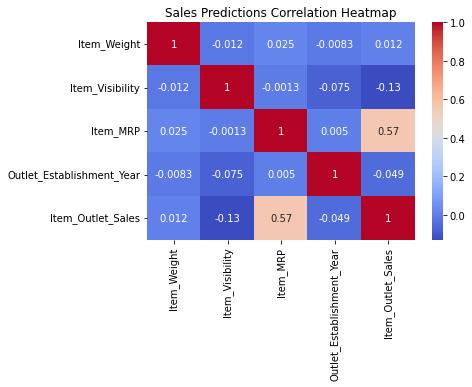

In [22]:
corr = sales_df.corr() #heatmap
sns.heatmap(corr, cmap = 'coolwarm', annot = True).set(title = 'Sales Predictions Correlation Heatmap')



#Part 4: Exploratory Viz

(0.0, 2500.0)

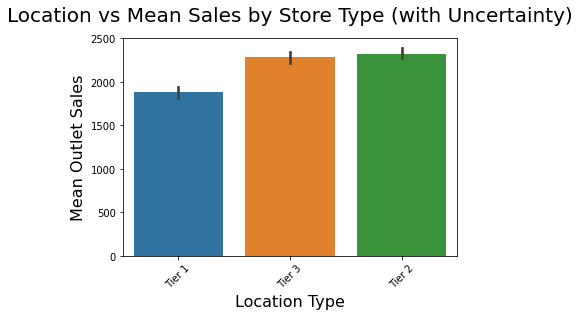

In [23]:
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=sales_df) # boxplot with variance
plt.xticks(rotation = 45)
plt.title('Location vs Mean Sales by Store Type (with Uncertainty)',fontsize=20, y=1.05)
plt.xlabel('Location Type', fontsize = 16)
plt.ylabel('Mean Outlet Sales', fontsize = 16)
plt.ylim(bottom=0,top=2500)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


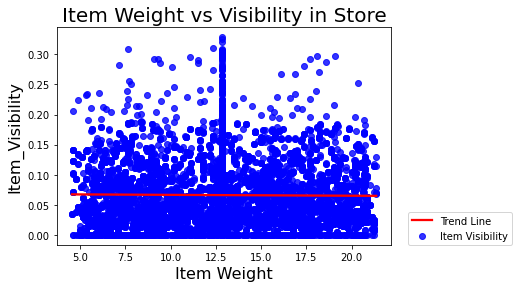

In [24]:
sns.regplot(sales_df['Item_Weight'], sales_df['Item_Visibility'],scatter_kws={"color": "blue"}, line_kws={"color": "red"}) #scatter plot (showing very little correlation between values)
plt.xlabel('Item Weight', fontsize = 16)
plt.ylabel('Item_Visibility', fontsize = 16)
plt.title('Item Weight vs Visibility in Store',fontsize=20)
plt.legend(labels=["Trend Line","Item Visibility"], loc = (1.05,0))

# Part 5: Data Preprocessing for ML

In [25]:
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
X = sales_df.drop (columns = 'Item_Outlet_Sales')

In [27]:
y= sales_df.drop(columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type'])

In [28]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1


In [29]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # Train test split 


In [31]:
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
#select the numeric columns of each type
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)
#check our lists
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)


numeric columns are ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
categorical columns are ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']


In [34]:
mean_imputer = SimpleImputer(strategy='mean')
#Fit the imputer object on the numeric training data with .fit() 
#calculates the medians of the columns in the training set
mean_imputer.fit(X_train[num_columns])
#Use the median from the training data to fill the missing values in 
#the numeric columns of both the training and testing sets with .transform()
X_train.loc[:, num_columns] = mean_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = mean_imputer.transform(X_test[num_columns])


In [35]:
X_train.isna().any() #check for missing



Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool

In [36]:
#instantiate one hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
#fit the OneHotEncoder on the training data
ohe.fit(X_train[cat_columns])
#transform both the training and the testing data
train_ohe = ohe.transform(X_train[cat_columns])
test_ohe = ohe.transform(X_test[cat_columns])
train_ohe


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [37]:
ohe_column_names = ohe.get_feature_names_out(X_train[cat_columns].columns) #get column names
train_ohe = pd.DataFrame(train_ohe, columns=ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns=ohe_column_names)
train_ohe

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
# instantiate scaler
scaler = StandardScaler()
# fit scaler on training data
scaler.fit(X_train[num_columns])

# transform training data
train_scaled = scaler.transform(X_train[num_columns])
# transform testing data
test_scaled = scaler.transform(X_test[num_columns])

In [39]:
# create a numeric selector
num_selector = make_column_selector(dtype_include='number')
# isolate the numeric columns
train_nums = X_train[num_columns].reset_index(drop=True)
test_nums = X_test[num_columns].reset_index(drop=True)
# re-combine the train and test sets
X_train_processed = pd.concat([train_nums, train_ohe], axis=1)
X_test_processed = pd.concat([test_nums, test_ohe], axis=1)

In [40]:
X_test_processed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300000,0.026300,79.4302,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930000,0.071136,42.7086,1997.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500000,0.041313,42.0454,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12.857645,0.044767,173.7054,1985.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195000,0.012456,197.5110,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,17.600000,0.007994,171.6422,1987.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2127,10.195000,0.000000,143.1154,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2128,8.100000,0.128296,210.4902,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2129,6.590000,0.026226,119.0098,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
